## DATA CLEANING AND EXPLORATORATORY DATA ANALYSIS OF TITANIC DATSET 

### PRODIGY INFOTECH                                                 

### DONE BY - SRIKANTA MAHARA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D                     # importing all important library 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [2]:
titanic_data = pd.read_csv("C:\\Users\\A\\Downloads\\TITANIC.csv")  # loading the dataset

In [3]:
titanic_data.head(10)   #CHECKING FIRST 15 DATA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
titanic_data.tail(10) #CHECKING LAST 15 DATA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
titanic_data.shape   #checking the number of rows and coloumns

(418, 12)

In [6]:
titanic_data.dtypes   #checking the data types 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
null_counts = titanic_data.isnull().sum()
print("Null value counts in the dataset:")    # Print the count of null values for each column
print(null_counts)

Null value counts in the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## DATA CLEANING 

In [8]:
data_cleaned = titanic_data.dropna()  # DROPPING THE NULL VALUES 
print("Original dataset shape:", titanic_data.shape)
print("Cleaned dataset shape:", data_cleaned.shape)   # Print the shape of the original and cleaned datasets

Original dataset shape: (418, 12)
Cleaned dataset shape: (87, 12)


In [9]:
print("Column names in the dataset:")
for column in titanic_data.columns:       #COLOUMNS IN THE DATASET 
    print(column)

Column names in the dataset:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [10]:
titanic_data.info ()    #INFORMATION ABOUT THE DATASET 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### DESCRIPTIVE STATISTICS OF THE DATASET

In [11]:
titanic_data.describe()   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Co-relation Between the coloumns

In [12]:
corr=titanic_data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


# EXPLORATORY DATA ANALYSIS 

## LINE CHART 

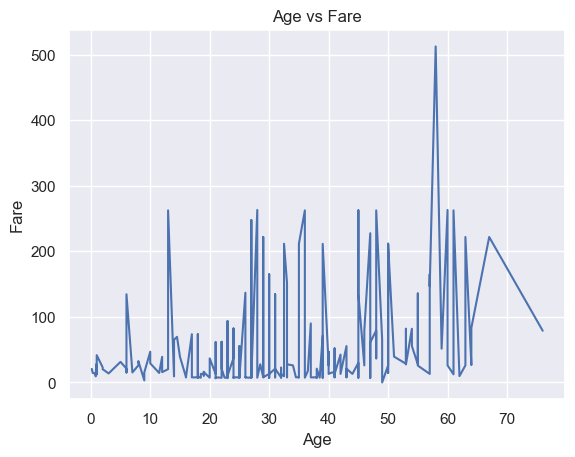

In [13]:
# Filter out missing values in the 'Age' and 'Fare' columns
filtered_df = titanic_data[['Age', 'Fare']].dropna()

# Sort the DataFrame by 'Age' in ascending order
sorted_df = filtered_df.sort_values(by='Age')

# Create the line chart
plt.plot(sorted_df['Age'], sorted_df['Fare'])

# Set plot title and labels
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Display the plot
plt.show()


# SCATTER PLOT 

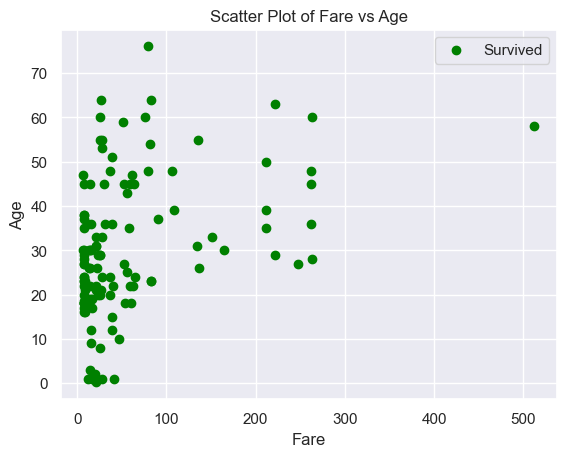

In [14]:
# Extract the necessary information for the scatter plot
fare_age_data = titanic_data[['Fare', 'Age', 'Survived']]

# Separate the data based on survival
survived_data = fare_age_data[fare_age_data['Survived'] == 1]

# Plot the scatter plot
plt.scatter(survived_data['Fare'], survived_data['Age'], color='green', label='Survived')

# Set the labels and title
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatter Plot of Fare vs Age')

# Add a legend
plt.legend()

# Display the plot
plt.show()


# COUNT PLOT 

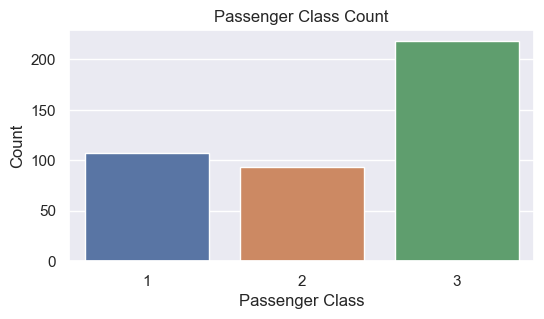

In [15]:
# Count the number of passengers in each passenger class
passenger_class_counts = titanic_data['Pclass'].value_counts()
plt.figure(figsize=(6, 3))

# Plot the count plot
sns.countplot(data=titanic_data, x='Pclass')

# Set the labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Count')

# Display the plot
plt.show()


# BOX PLOT 


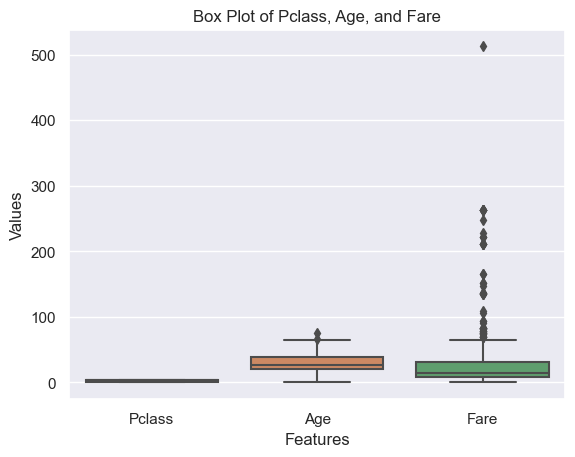

In [16]:
# Select the relevant columns for the box plot
boxplot_data = titanic_data[['Pclass', 'Age', 'Fare']]

# Plot the box plot
sns.boxplot(data=boxplot_data)

# Set the labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot of Pclass, Age, and Fare')

# Display the plot
plt.show()


# PAIR GRID PLOT  

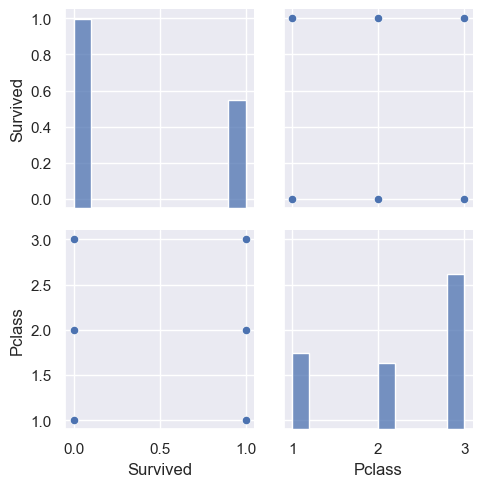

In [17]:
columns = ['Survived', 'Pclass']
pairgrid = sns.PairGrid(data=titanic_data[columns])
pairgrid.map_diag(sns.histplot)
pairgrid.map_offdiag(sns.scatterplot)
# Display the plot
plt.show()


# STACK PLOT

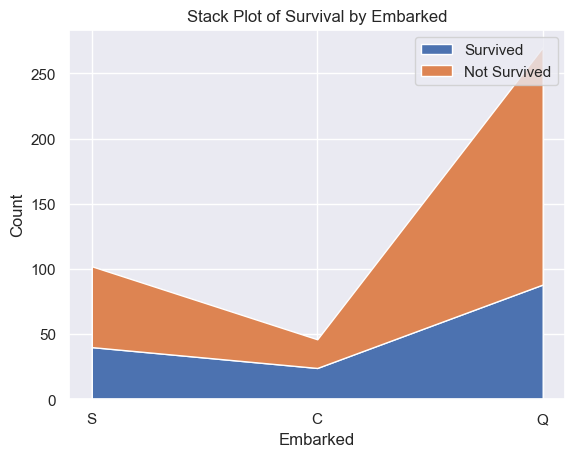

In [18]:
# Extract the necessary information for the stack plot
embarked_counts = titanic_data['Embarked'].value_counts()
survived_counts = titanic_data.groupby('Embarked')['Survived'].sum()
not_survived_counts = embarked_counts - survived_counts

# Create the stack plot
plt.stackplot(embarked_counts.index, survived_counts, not_survived_counts, labels=['Survived', 'Not Survived'])

# Set the labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Stack Plot of Survival by Embarked')
plt.legend()

# Display the plot
plt.show()


# JOINT GRID PLOT 

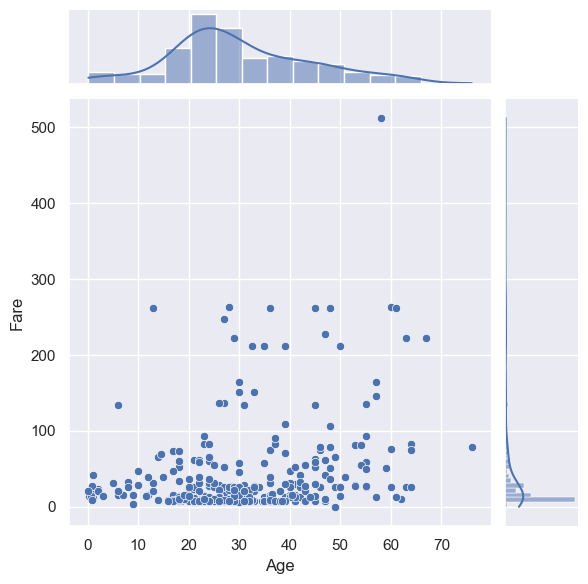

In [19]:
# Create the joint grid plot
grid = sns.JointGrid(data=titanic_data, x='Age', y='Fare')
grid.plot_joint(sns.scatterplot)
grid.plot_marginals(sns.histplot, kde=True)

# Set the titles for the plot
grid.set_axis_labels(xlabel='Age', ylabel='Fare')

# Display the plot
plt.show()


# KDE PLOT 

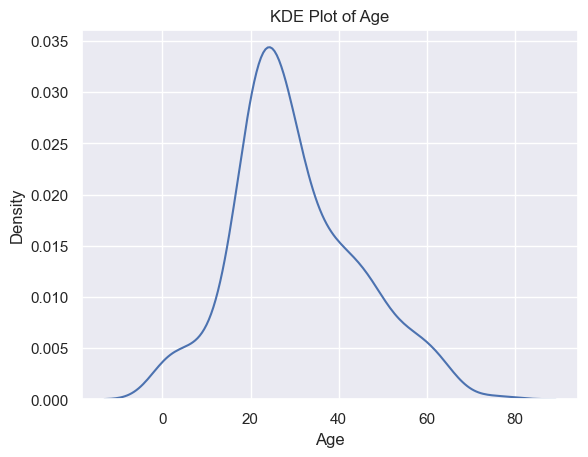

In [20]:
# Create the KDE plot
sns.kdeplot(data=titanic_data, x='Age')

# Set the title and labels for the plot
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the plot
plt.show()


# DISPLOT 

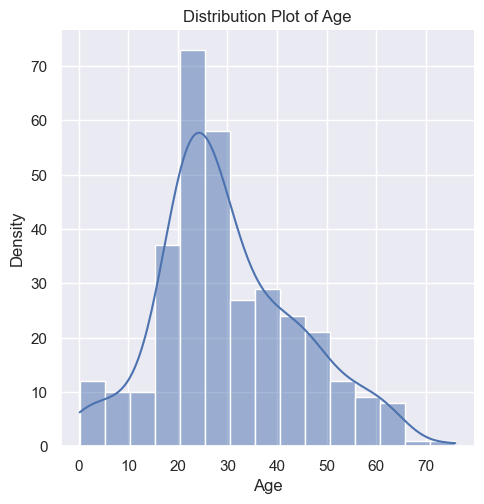

In [21]:
# Create the displot
sns.displot(data=titanic_data, x='Age', kde=True)

# Set the title and labels for the plot
plt.title('Distribution Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the plot
plt.show()


# VIOLIN PLOT 

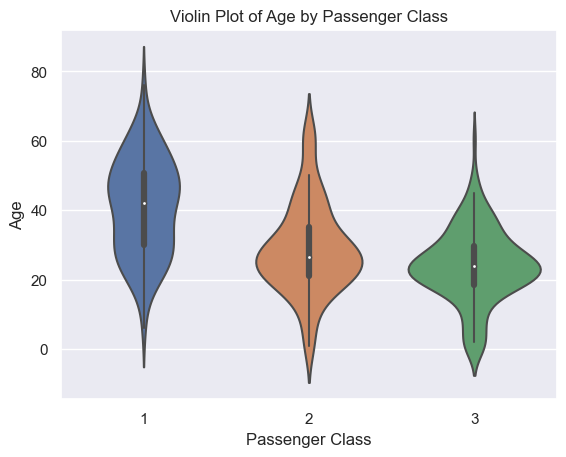

In [22]:
# Create the violin plot
sns.violinplot(data=titanic_data, x='Pclass', y='Age')

# Set the title and labels for the plot
plt.title('Violin Plot of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Display the plot
plt.show()


# STRIP PLOT 

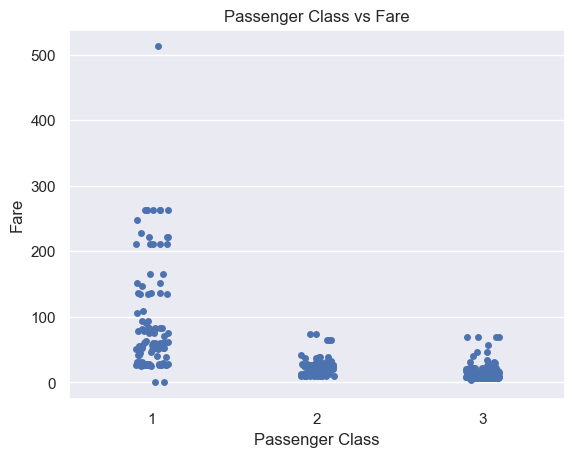

In [23]:
# Filter out missing values in the 'Fare' and 'Pclass' columns
filtered_df = titanic_data[['Fare', 'Pclass']].dropna()

# Create the strip plot
sns.stripplot(data=filtered_df, x='Pclass', y='Fare')

# Set plot title and labels
plt.title('Passenger Class vs Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

# Display the plot
plt.show()


# HEATMAP

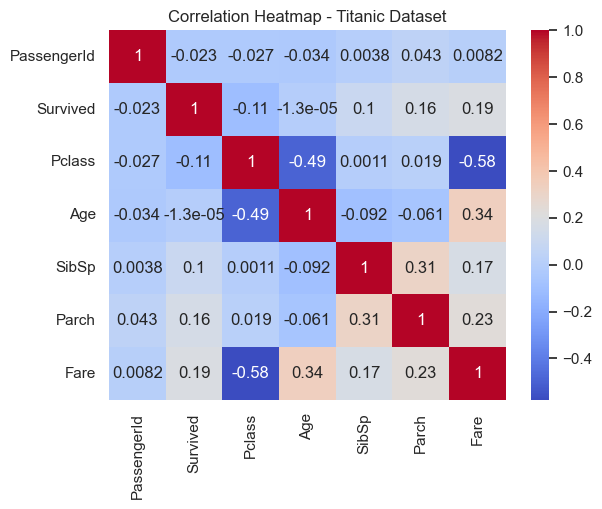

In [24]:
# Calculate the correlation matrix
correlation_matrix = titanic_data.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title for the plot
plt.title('Correlation Heatmap - Titanic Dataset')

# Display the plot
plt.show()


# BUBBLE PLOT

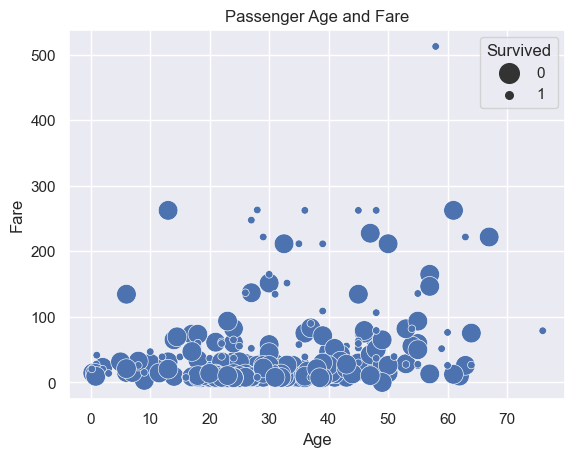

In [25]:
# Filter out missing values in the 'Age', 'Fare', and 'Survived' columns
filtered_df = titanic_data[['Age', 'Fare', 'Survived']].dropna()

# Create the bubble plot
sns.scatterplot(data=filtered_df, x='Age', y='Fare', size='Survived', sizes=(30, 200))

# Set plot title and labels
plt.title('Passenger Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Display the plot
plt.show()



# JOINT PLOT

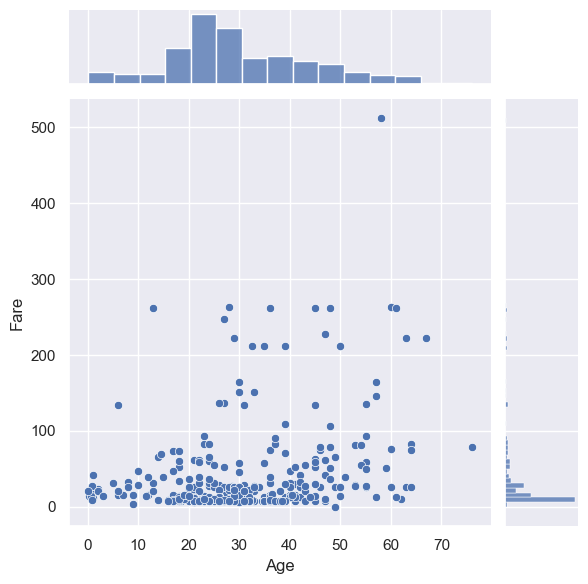

In [26]:
# Select a subset of columns for the joint grid plot
subset_df = titanic_data[['Age', 'Fare', 'Pclass']]

# Create the joint grid plot
sns.jointplot(x='Age', y='Fare', data=subset_df, kind='scatter')

# Display the plot
plt.show()


# GRID MAP

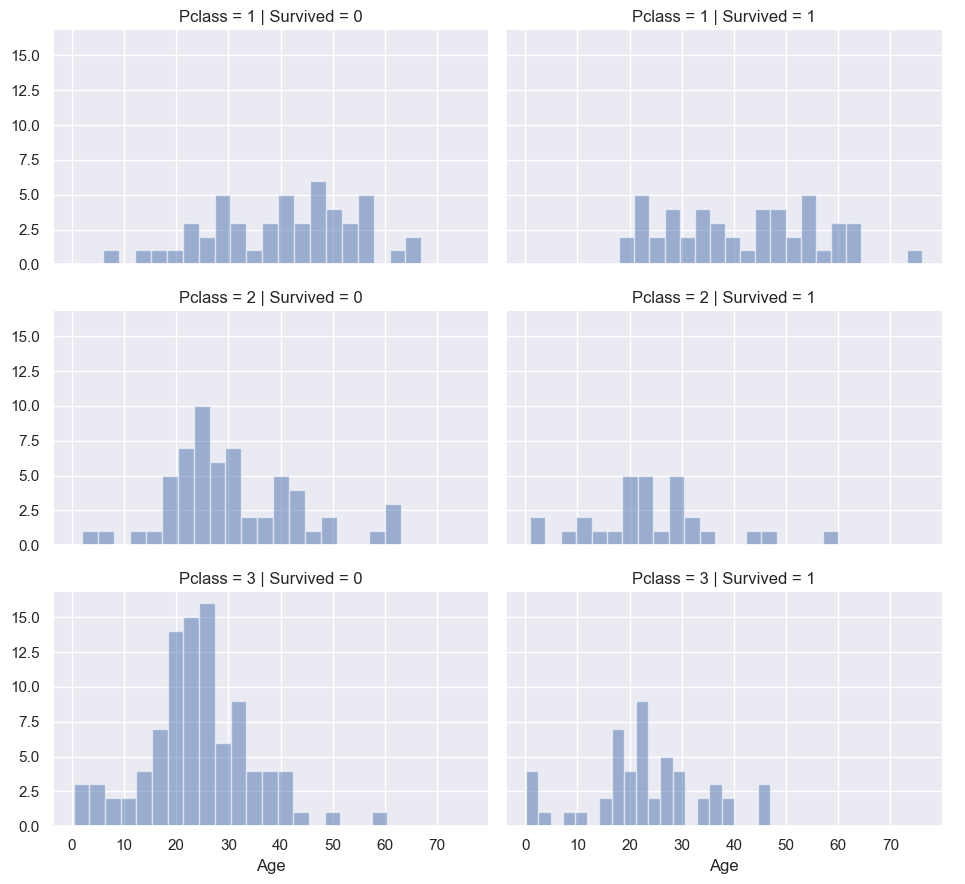

In [27]:
grid = sns.FacetGrid(titanic_data, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# PAIR PLOT

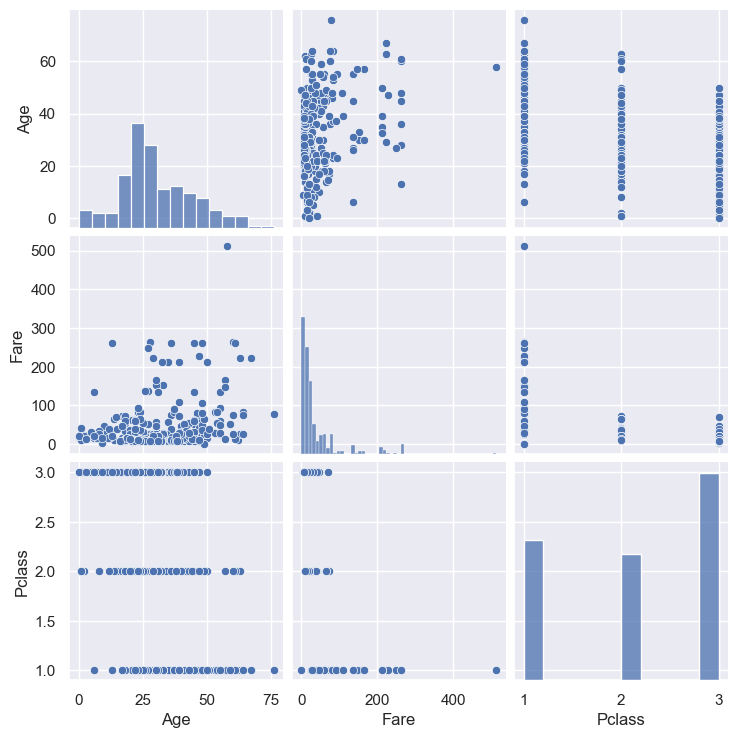

In [28]:
# Select the variables for the pair plot
variables = ['Age', 'Fare', 'Pclass']

# Filter out missing values in the selected variables
filtered_df = titanic_data[variables].dropna()

# Create the pair plot
sns.pairplot(filtered_df)

# Display the plot
plt.show()


# DISTRIBUTION PLOT

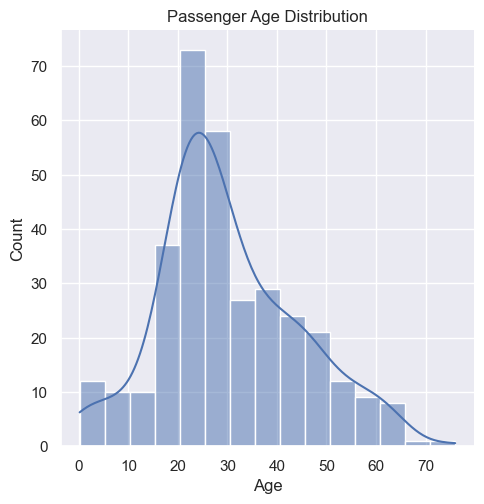

In [29]:
# Filter out missing values in the 'Age' column
filtered_df = titanic_data['Age'].dropna()

# Create the distribution plot (displot)
sns.displot(filtered_df, kde=True)

# Set plot title and labels
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


# HISTOGRAM

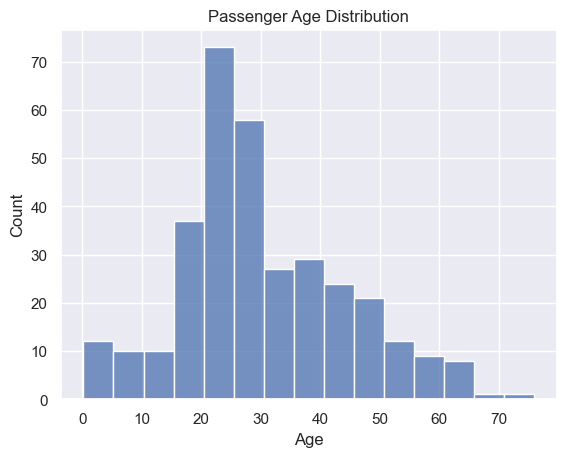

In [30]:
# Filter out missing values in the 'Age' column
filtered_df = titanic_data['Age'].dropna()

# Create the histogram plot (histplot)
sns.histplot(filtered_df)

# Set plot title and labels
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()


## DECISON TREE OF THE DATASET 

Accuracy: 1.00


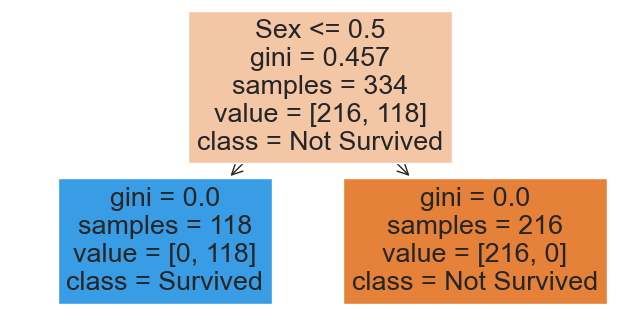

In [31]:
data = pd.read_csv("C:\\Users\\A\\Downloads\\TITANIC.csv")

# Select columns for classification
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# Use only the selected columns
data = data[selected_columns + ['Survived']]

# Convert categorical variables to numerical values
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

# Split the data into features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the feature names as a list
feature_names = list(X.columns)

# Visualize the decision tree
plt.figure(figsize=(8, 4))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['Not Survived', 'Survived'])
plt.show()
